In [413]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [414]:
apikey = 'LgzaLja3s4JiKgoWEA8sMwY47p0lpSuRP9ornmMHewMxBXIuIaoCn9OxL7tcxq7C'
secret = 'gt2elSroXHHzkyMCORGYdkElZuJG4h53zSynqt5Gawqz632trBv9MrpCi7Xma7yU'

In [415]:
client = Client(apikey, secret)

In [416]:
tickers = client.get_all_tickers()  # Get Tickers

In [417]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.07264500'},
 {'symbol': 'LTCBTC', 'price': '0.00293800'},
 {'symbol': 'BNBBTC', 'price': '0.00999800'},
 {'symbol': 'NEOBTC', 'price': '0.00053300'},
 {'symbol': 'QTUMETH', 'price': '0.00230700'},
 {'symbol': 'EOSETH', 'price': '0.00082700'},
 {'symbol': 'SNTETH', 'price': '0.00001840'},
 {'symbol': 'BNTETH', 'price': '0.00088600'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00013230'},
 {'symbol': 'BNBETH', 'price': '0.13770000'},
 {'symbol': 'BTCUSDT', 'price': '41574.94000000'},
 {'symbol': 'ETHUSDT', 'price': '3019.88000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001360'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [418]:
tickers[1]

{'symbol': 'LTCBTC', 'price': '0.00293800'}

#  Get Historical Data

In [419]:
historical = client.get_historical_klines('LTCBTC', Client.KLINE_INTERVAL_1DAY, 'Jan 2021')

In [420]:
historical

[[1609891200000,
  '0.00467000',
  '0.00486100',
  '0.00455800',
  '0.00459600',
  '528291.05000000',
  1609977599999,
  '2469.39461277',
  118861,
  '252535.44000000',
  '1180.17316439',
  '0'],
 [1609977600000,
  '0.00459600',
  '0.00466000',
  '0.00427600',
  '0.00429500',
  '699016.13000000',
  1610063999999,
  '3122.35016723',
  157025,
  '354873.68000000',
  '1584.45925677',
  '0'],
 [1610064000000,
  '0.00429700',
  '0.00443500',
  '0.00407700',
  '0.00424300',
  '674547.61000000',
  1610150399999,
  '2848.89420581',
  130618,
  '319797.36000000',
  '1350.40300463',
  '0'],
 [1610150400000,
  '0.00424200',
  '0.00445600',
  '0.00415100',
  '0.00442400',
  '437553.66000000',
  1610236799999,
  '1860.12941196',
  87671,
  '206498.20000000',
  '877.96000610',
  '0'],
 [1610236800000,
  '0.00442300',
  '0.00461400',
  '0.00429400',
  '0.00445800',
  '585515.91000000',
  1610323199999,
  '2598.87340363',
  119767,
  '286459.69000000',
  '1272.43973681',
  '0'],
 [1610323200000,
  '0.

In [421]:
hist_df = pd.DataFrame(historical)

In [422]:
hist_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1609891200000,0.00467000,0.00486100,0.00455800,0.00459600,528291.05000000,1609977599999,2469.39461277,118861,252535.44000000,1180.17316439,0
1,1609977600000,0.00459600,0.00466000,0.00427600,0.00429500,699016.13000000,1610063999999,3122.35016723,157025,354873.68000000,1584.45925677,0
2,1610064000000,0.00429700,0.00443500,0.00407700,0.00424300,674547.61000000,1610150399999,2848.89420581,130618,319797.36000000,1350.40300463,0
3,1610150400000,0.00424200,0.00445600,0.00415100,0.00442400,437553.66000000,1610236799999,1860.12941196,87671,206498.20000000,877.96000610,0
4,1610236800000,0.00442300,0.00461400,0.00429400,0.00445800,585515.91000000,1610323199999,2598.87340363,119767,286459.69000000,1272.43973681,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,1643760000000,0.00297300,0.00299400,0.00291800,0.00293700,110779.81900000,1643846399999,328.09902024,38733,53696.82300000,159.04410646,0
393,1643846400000,0.00293500,0.00298200,0.00289800,0.00297400,102785.15400000,1643932799999,301.93579546,33050,51257.16100000,150.53392128,0
394,1643932800000,0.00297400,0.00300700,0.00289600,0.00292000,107418.43800000,1644019199999,315.94744642,37059,50598.68400000,148.89222535,0
395,1644019200000,0.00291900,0.00296800,0.00286600,0.00294200,102660.31500000,1644105599999,300.76195234,35544,53582.33900000,156.95283132,0


# open time have differnce of 8,64,00,000 for every next data , and close time too have the same differnce of 8,64,00,000 

In [423]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [424]:

hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [425]:
df = hist_df[['Close']]

In [426]:


df.head()

,Close
0,0.00459600
1,0.00429500
2,0.00424300
3,0.00442400
4,0.00445800


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   397 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [428]:

df["Close"] = df["Close"].apply(pd.to_numeric)


<ipython-input-428-ccd832317e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Close"] = df["Close"].apply(pd.to_numeric)


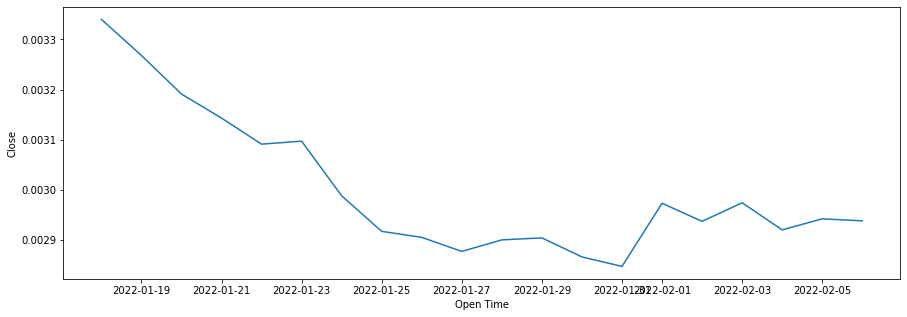

In [429]:
plt.figure(figsize=(15,5))
sns.lineplot(x = hist_df['Open Time'].tail(20),y= df.Close.tail(20)  )
plt.show()

In [430]:
PR =ProfileReport(df)
PR.to_widgets()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [431]:
sc = MinMaxScaler(feature_range = (0, 1))
sclaed_df = sc.fit_transform(df)

In [432]:
X_train = []   #30 : timestep // 397 : length of the data
y_train = []
for i in range(35, 397):
    X_train.append(sclaed_df[i-35:i, 0])
    y_train.append(sclaed_df[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [474]:
y_test = []
for i in range(35, 397):
    y_test.append(sclaed_df[i, 0])
y_test = np.array(y_test)      #creating y test for 

In [434]:
Lr.score(X_train,y_train)

0.9517855861492114

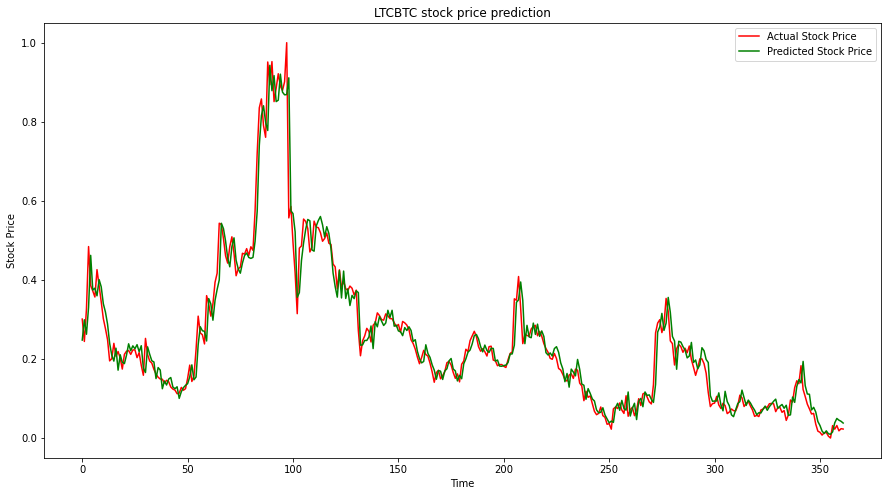

In [435]:
plt.figure(figsize=(15,8))
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(Lr.predict(X_train), color = 'green', label = 'Predicted Stock Price')
plt.title('LTCBTC stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Now lets create a variable to predict the next day stock price

In [436]:
List=[]
for i in sclaed_df[362:]:
    List.append(i)
List = np.array(List) 
For_pred = List.ravel()
For_pred #have taken the list of Last 35 days stock price, which can help us to predict the next day price

array([0.08748754, 0.08673978, 0.0667996 , 0.07701894, 0.0772682 ,
       0.06505484, 0.06954138, 0.04461615, 0.05807577, 0.09621137,
       0.09097707, 0.1273679 , 0.14481555, 0.13758724, 0.18295115,
       0.12288136, 0.10493519, 0.08574277, 0.07377866, 0.06081755,
       0.06231306, 0.03514457, 0.01744766, 0.01445663, 0.00747757,
       0.01321037, 0.01420738, 0.00473579, 0.        , 0.03140578,
       0.0224327 , 0.03165503, 0.01819541, 0.02367896, 0.02268195])

In [471]:
Lr.predict([For_pred]) #prediction value for next day

array([0.02900531])

In [473]:
sclaed_df[-1] #value of last day

array([0.02268195])

# As we can see the next day prediction is greater than the Last day price, So the stock price will be increasing next day